<a href="https://colab.research.google.com/github/EJ1210/nba_analysis/blob/master/NBA_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

How many players have played in the NBA?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

nba = pd.read_csv('NBAData.csv')

nba.set_index('name')
## Set the NBA Dataset index to begin with name


players = nba['name'].nunique()

## Created a variable to distinctly count the amount of players who ahave played in the NBA

print(f'There have beeen {players} players who have played in the NBA from 1950 to 2017.')

There have beeen 3504 players who have played in the NBA from 1950 to 2017.


What is the Avg Number of Seasons in the NBA?

In [4]:
numberofseasons= nba.groupby(['name'])['name'].count()

## Created a variable that counts the number of years per player.

avgseasons = numberofseasons.mean()

## Created a variable that finds the average number of years amoungst all NBA players

avgseasons = int(avgseasons)

## Casted the average from a float to an int.

print(f'An NBA player plays {avgseasons} seaons on average. ')

An NBA player plays 6 seaons on average. 


Who are the top ___ players who scored most points in a single season?

Top: 10


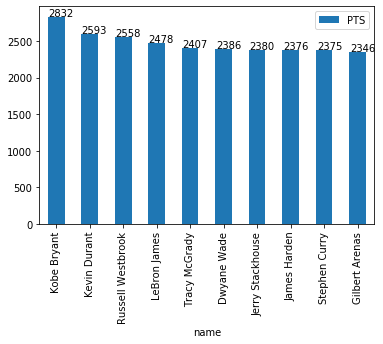

In [5]:
points = nba[['name','Year','PTS']]
## Smaller Dataset to extract the players name, points, and year achieved

def get_number():
    """
    Gets user choice
    """

    user__input = input('Top: ')
    return user__input

## Function for the user to input how many players they would like to see

response = int(get_number())

## Created a response variable to cast the user input into an int

players1 = points.sort_values(by='PTS',ascending=False).drop_duplicates(['name'], keep='first')

## Created variable that sorts the dataset by highest amount of points per season per player 
## and drops the remaining seasons.

players11 = players1.sort_values(by=['PTS'], ascending=False).head(response).set_index('name')

## Edit variable to call the top players by the user input.

name_year = 'name'+' '+'Year'

players1graph = players11.plot.bar(by=name_year, y= 'PTS')
for p in players1graph.patches:
    players1graph.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
## Graph the top__ on a plot.

players1graph



Who are the top ___ players who scored most points ever?

Top: 10


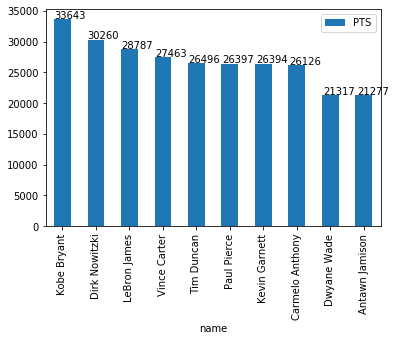

In [6]:
points1 = nba[['name','PTS']].set_index('name')

def get_number():
    """
    Gets user choice
    """

    user__input = input('Top: ')
    return user__input


response = int(get_number())


total_points = points1.groupby('name').sum().sort_values(by=['PTS'], ascending=False).head(response)

total_points

total_points = total_points.plot.bar()
for p in total_points.patches:
    total_points.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

Who are the best Marksmen in the NBA?

In [33]:
threepoint = nba[['name','3P','3PA','3P%']]

marksmen = threepoint.groupby('name').sum().sort_values(by=['3P','3P%'], ascending=[False,False]).head(10)

marksmen

,3P,3PA,3P%
name,,,
Kyle Korver,2322.0,5409.0,7.697
Vince Carter,2292.0,6119.0,8.433
Tim Hardaway,2251.0,6349.0,7.400
Chauncey Billups,2245.0,5810.0,8.376
Jason Terry,2242.0,5895.0,6.832
Jamal Crawford,2191.0,6255.0,6.800
Jason Kidd,2168.0,6178.0,8.126
Paul Pierce,2143.0,5816.0,6.994
Peja Stojakovic,1979.0,4932.0,7.455


Who is the Greatest of all time?

In [9]:
class Player:
  def __init__(self, name, position, height, PTS):
   self.name = name
   self.position = position
   self.height = height
   self.PTS = PTS

p1 = Player('Micheal Jordan', 'G', '6-6', '32,292')

print(f'The greatest player of all time is {p1.name}.')

The greatest player of all time is Micheal Jordan.


What is ___________ stat line?

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

nba = pd.read_csv('NBAData.csv')

points2 = nba[['name', 'PTS']]
points2 = points2.set_index('name').groupby('name').sum().sort_values(by=['PTS'], ascending=False)
points2 = points2.T.to_dict('list')


player = input('Players First & Last Name: ')

print(f'{player} has scored {points2[player]} career points.')

Players First & Last Name: Kevin Durant
Kevin Durant has scored [19121] career points.
